In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.shape

(7043, 21)

In [4]:
data.isna().sum().sum()

0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
data = data.drop('customerID',axis = 1)
data.shape

(7043, 20)

TotalCharges column must be float but info is showing it as object type.

Maybe some data are missing. So, let's check if there are any empty data in that column.

In [8]:
data.loc[data['TotalCharges']== " "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
# Replacing the empty data with NaN so that when we convert it to float, system does not throw error

data['TotalCharges'] = data['TotalCharges'].replace(" ",np.nan)
data['TotalCharges'] = data['TotalCharges'].astype(float)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [11]:
data.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### Let's fill the nan values with mean of the column since it is a continuous data

In [12]:
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].mean())

In [13]:
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
data_cont = data[['MonthlyCharges','TotalCharges']]
data_cont.describe()

,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000
mean,64.761692,2283.300441
std,30.090047,2265.000258
min,18.250000,18.800000
25%,35.500000,402.225000
50%,70.350000,1400.550000
75%,89.850000,3786.600000
max,118.750000,8684.800000


In [15]:
data_cont.skew()

MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

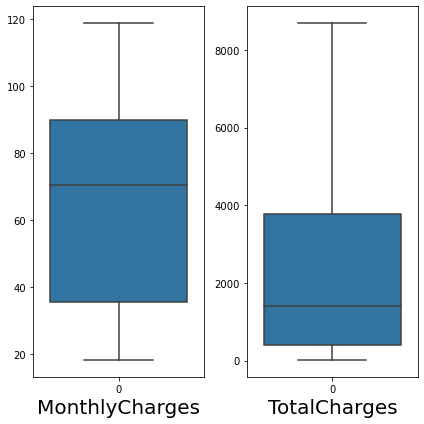

In [16]:
plt.figure(figsize = (6,6))
graph = 1

for column in data_cont:
    if graph <=2 :
        ax = plt.subplot(1,2,graph)
        sns.boxplot(data=data_cont[column])
        plt.xlabel(column,fontsize = 20)
    graph +=1
plt.tight_layout()

### Outliers and skewness need not be treated
### Visualization for categorical columns

In [20]:
data_cat = data.drop(columns=['MonthlyCharges','TotalCharges'],axis = 1)
data_cat.shape

(7043, 18)

The value counts for gender is

Male      3555
Female    3488
Name: gender, dtype: int64 



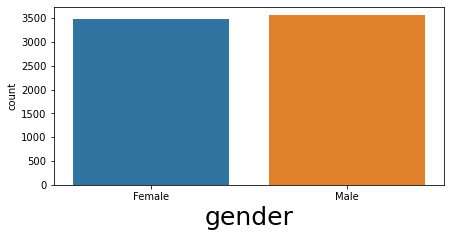

The value counts for SeniorCitizen is

0    5901
1    1142
Name: SeniorCitizen, dtype: int64 



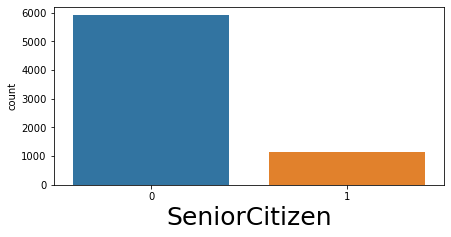

The value counts for Partner is

No     3641
Yes    3402
Name: Partner, dtype: int64 



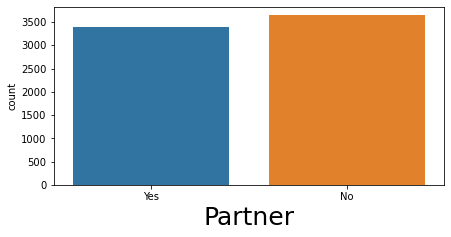

The value counts for Dependents is

No     4933
Yes    2110
Name: Dependents, dtype: int64 



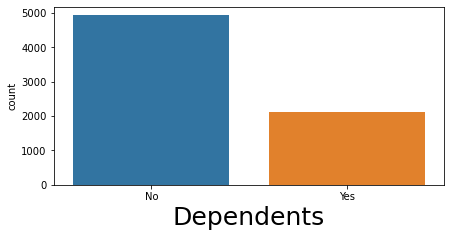

The value counts for tenure is

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64 



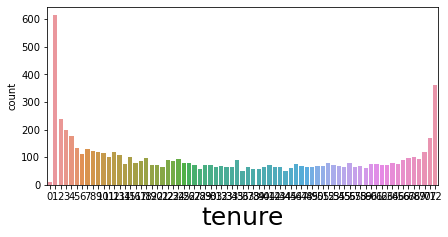

The value counts for PhoneService is

Yes    6361
No      682
Name: PhoneService, dtype: int64 



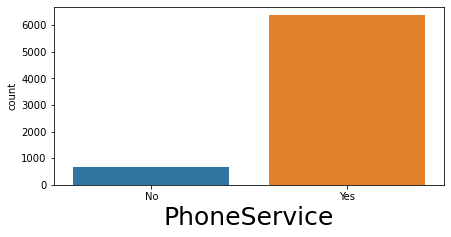

The value counts for MultipleLines is

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64 



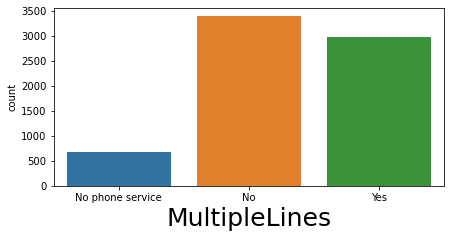

The value counts for InternetService is

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64 



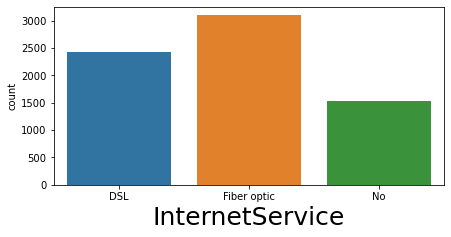

The value counts for OnlineSecurity is

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64 



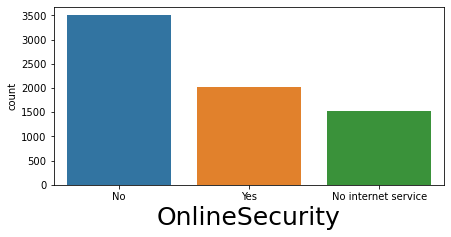

The value counts for OnlineBackup is

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64 



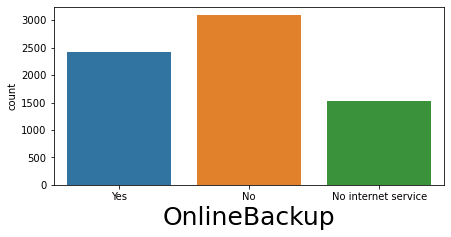

The value counts for DeviceProtection is

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64 



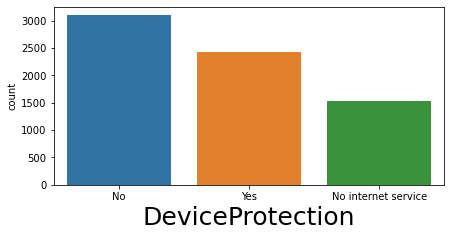

The value counts for TechSupport is

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64 



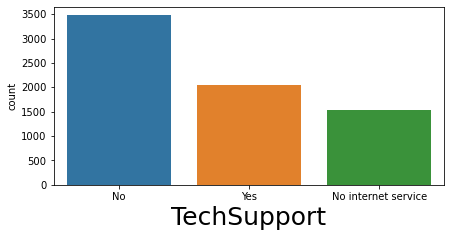

The value counts for StreamingTV is

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64 



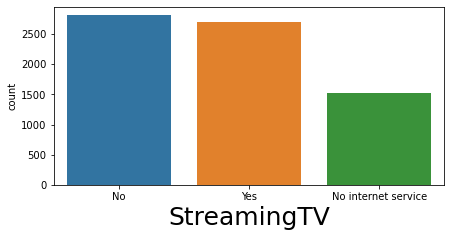

The value counts for StreamingMovies is

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64 



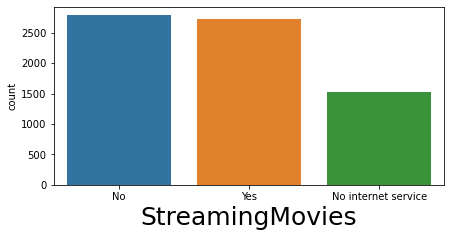

The value counts for Contract is

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64 



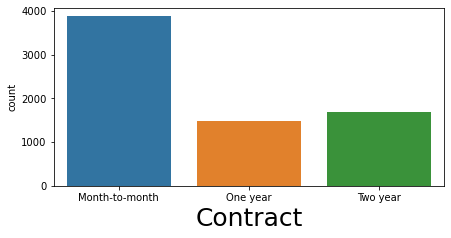

The value counts for PaperlessBilling is

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64 



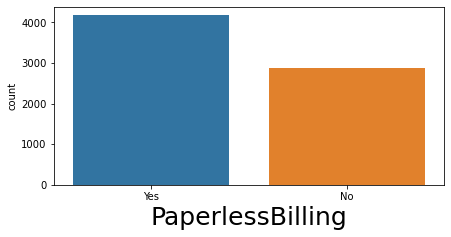

The value counts for PaymentMethod is

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64 



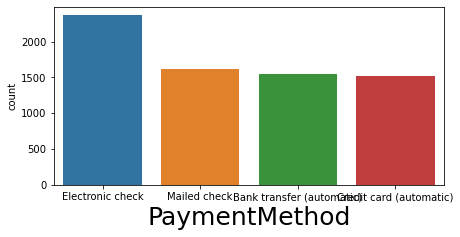

The value counts for Churn is

No     5174
Yes    1869
Name: Churn, dtype: int64 



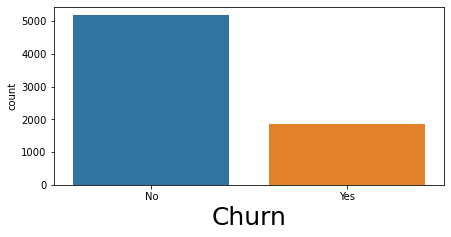

In [21]:
plotnumber = 1

for column in data_cat :
    plt.figure(figsize = (7,70))
    if plotnumber <=18:
        ax = plt.subplot(18,1,plotnumber)
        sns.countplot(data_cat[column])
        plt.xlabel(column,fontsize = 25)
        print(f"The value counts for {column} is\n")
        print(data_cat[column].value_counts(),'\n')
        plt.show()
    plotnumber +=1

### Analysis

**Personal Info:**
- There are more or less equal number of male and female customers and do not differ much.
- Most customers are not senior citizens.
- There is slighly more number of customers who are married than unmarried customers.
- 2/3rd of them have dependents in their family.

**Connectivity and security:**
- Most of them have phone service but among them, more number of them has no multiple lines than who has
- Most number of the customers use Fibre optic Internet service followed by DSL; but less number of them has no Online security and Online backup at their disposal.
- And around 1500 of them have no internet connection.
- More number of customers have no device protection software nor Tech support than who does.
- Slightly more customers have no streaming TV and movies.

**Financial details:**
- Most customers has a month-to-month contract followed by one year and two year.
- Around 2/3rd of them use paperless-billing.
- Most customers use paperless check as their payment method followed by mailed check, bank transfer and credit card.

### Visualization for continuous data

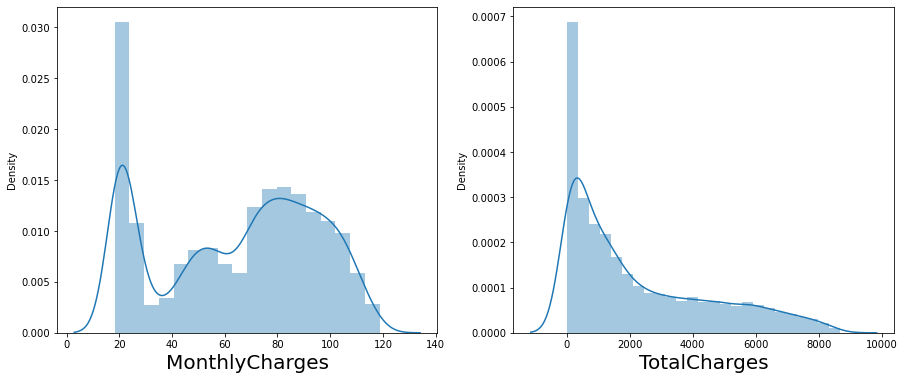

In [22]:
plt.figure(figsize = (15,6))
plotnumber = 1

for i in data_cont :
    if plotnumber <=2 :
        ax = plt.subplot(1,2,plotnumber)
        sns.distplot(data_cont[i])
        plt.xlabel(i,fontsize = 20)
    plotnumber +=1
plt.show()

### Encoding the categorical data

In [23]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

for i in data.columns:
    if data[i].dtypes == "object":
        data[i] = enc.fit_transform(data[i].values.reshape(-1,1))

In [24]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0


### Let's check the correlation of the features with the target variable

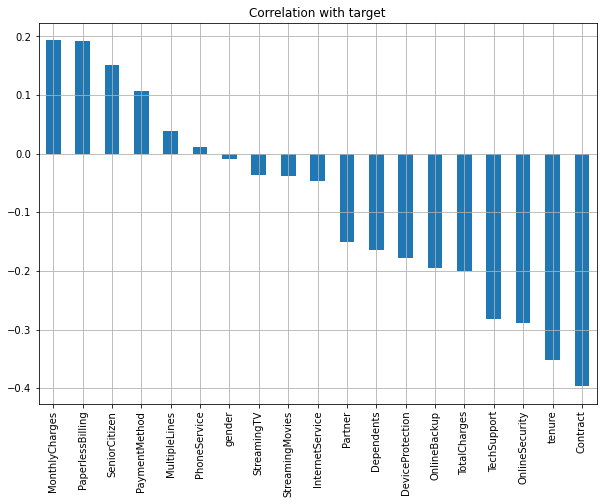

In [25]:
corr = data.drop('Churn', axis = 1).corrwith(data.Churn).sort_values(ascending=False)

corr.plot(kind = 'bar', grid = True, figsize = (10,7),
          title = "Correlation with target")
plt.show()

### Let's decide not to drop any columns since our dataset columns is not that many.
- **Monthly charges** has the highest positive correlation followed by **paperless-billing and senior citizen.**
- **Contract** has the highest negative correlation followed by **tenure, online security.**

### Model building

In [26]:
x = data.drop('Churn', axis = 1)
y = data.Churn

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [28]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [29]:
dt = DecisionTreeClassifier()
kn = KNeighborsClassifier()
bg = BaggingClassifier()
lr = LogisticRegression()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
svc = SVC()

In [30]:
for i in range(0,20):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25, random_state = i)
    lr.fit(x_train,y_train)
    y_train_pred = lr.predict(x_train)
    y_test_pred = lr.predict(x_test)
    print(f"At random state {i}, the training accuracy is : {accuracy_score(y_train,y_train_pred)}")
    print(f"At random state {i}, the testing accuracy is : {accuracy_score(y_test,y_test_pred)}\n")

At random state 0, the training accuracy is : 0.8042408178720182
At random state 0, the testing accuracy is : 0.7950028392958546

At random state 1, the training accuracy is : 0.80367285119273
At random state 1, the testing accuracy is : 0.8086314593980692

At random state 2, the training accuracy is : 0.8038621734191594
At random state 2, the testing accuracy is : 0.8018171493469619

At random state 3, the training accuracy is : 0.8027262400605831
At random state 3, the testing accuracy is : 0.8131743327654741

At random state 4, the training accuracy is : 0.8095418402120409
At random state 4, the testing accuracy is : 0.7859170925610448

At random state 5, the training accuracy is : 0.8067020068156001
At random state 5, the testing accuracy is : 0.7967064168086314

At random state 6, the training accuracy is : 0.8059447179098826
At random state 6, the testing accuracy is : 0.7989778534923339

At random state 7, the training accuracy is : 0.8067020068156001
At random state 7, the test

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25, random_state = 18)
lr.fit(x_train, y_train)

LogisticRegression()

In [32]:
y_test_pred = lr.predict(x_test)
print(f"The accuracy score is {accuracy_score(y_test,y_test_pred)*100:.2f} %")

The accuracy score is 81.49 %


### Cross Validation

In [33]:
test_acc = accuracy_score(y_test,y_test_pred)

for i in range (2,10):
    cv_score = cross_val_score(lr,x_scaled,y,cv = i)
    cv_mean  = cv_score.mean()
    print(f"At cv = {i},cv_score = {cv_mean*100:.4f} and accuracy for testing = {test_acc*100:.4f}\n")

At cv = 2,cv_score = 80.1363 and accuracy for testing = 81.4878

At cv = 3,cv_score = 80.2783 and accuracy for testing = 81.4878

At cv = 4,cv_score = 80.4062 and accuracy for testing = 81.4878

At cv = 5,cv_score = 80.2358 and accuracy for testing = 81.4878

At cv = 6,cv_score = 80.2358 and accuracy for testing = 81.4878

At cv = 7,cv_score = 80.4203 and accuracy for testing = 81.4878

At cv = 8,cv_score = 80.3351 and accuracy for testing = 81.4878

At cv = 9,cv_score = 80.2216 and accuracy for testing = 81.4878



In [34]:
cv_score = cross_val_score(lr,x_scaled,y,cv = 7)
cv_mean = cv_score.mean()
cv_mean

0.8042031538954667

### Hyperparameter tuning

In [35]:
param_grid = {'C':[0,5,10],
              'random_state':range(0,100),
              'dual':[False],
              'class_weight':[3,5,7,9,11,13]}

In [36]:
gridsearch = GridSearchCV(estimator = lr, param_grid = param_grid)
gridsearch.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0, 5, 10], 'class_weight': [3, 5, 7, 9, 11, 13],
                         'dual': [False], 'random_state': range(0, 100)})

In [37]:
gridsearch.best_params_

{'C': 5, 'class_weight': 3, 'dual': False, 'random_state': 0}

In [38]:
lr = LogisticRegression(C = 5, class_weight = 3, dual = False, random_state = 0)

In [39]:
lr.fit(x_train, y_train)

LogisticRegression(C=5, class_weight=3, random_state=0)

In [40]:
y_pred = lr.predict(x_test)
y_pred

array([0., 1., 0., ..., 0., 0., 1.])

In [41]:
cfm = confusion_matrix(y_test, y_pred)
cfm

array([[1167,  154],
       [ 171,  269]], dtype=int64)

In [42]:
print(classification_report(y_test, y_pred, digits = 2))

              precision    recall  f1-score   support

         0.0       0.87      0.88      0.88      1321
         1.0       0.64      0.61      0.62       440

    accuracy                           0.82      1761
   macro avg       0.75      0.75      0.75      1761
weighted avg       0.81      0.82      0.81      1761



In [43]:
# ROC curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [44]:
print('Threshold =',thresholds)
print('True positive rate =',tpr)
print('False positive rate =',fpr)

Threshold = [2. 1. 0.]
True positive rate = [0.         0.61136364 1.        ]
False positive rate = [0.         0.11657835 1.        ]


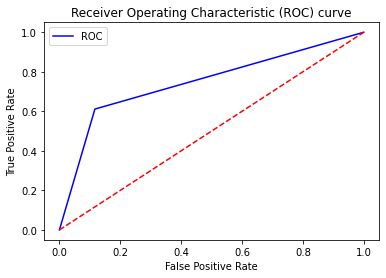

In [45]:
plt.plot(fpr, tpr, color = 'blue', label = 'ROC')
plt.plot([0,1], [0,1], color = 'red', linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.legend()
plt.show()

In [46]:
# Area Under the Curve AUC)

auc_score = roc_auc_score(y_test, y_pred)
auc_score

0.7473926433142934

### Saving the model in pickle format

In [51]:
import pickle
filename = 'Customer_churn_prediction.pkl'
pickle.dump(lr,open(filename,'wb'))